In [6]:
#death, became her (meryl streep said so)


Absolutely — let’s walk through a practical **Exploratory Data Analysis (EDA)** of this movie dataset, step-by-step. We’ll use Python (pandas, seaborn, matplotlib) and focus on **key questions**:

---

### ✅ Step 1: Load & Inspect
```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("final_df.csv")
df.info()
```

#### 🔍 What to Look For:
- **Missing values** (e.g., `production_budget`, `tmdb_rating`)
- **Data types** (e.g., `start_year` as float → convert to int)
- **Duplicates** (check `movie_id`)

---

### ✅ Step 2: Clean & Prepare
```python
# Drop rows with missing critical fields
df = df.dropna(subset=['imdb_rating', 'total_gross', 'production_budget'])

# Convert year to int
df['start_year'] = df['start_year'].astype(int)

# Create profit column
df['profit'] = df['total_gross'] - df['production_budget']
```

---

### ✅ Step 3: Univariate Analysis
#### 1. **IMDb Ratings Distribution**
```python
sns.histplot(df['imdb_rating'], bins=30, kde=True)
plt.title("IMDb Ratings")
```

#### 2. **Box Office Gross**
```python
sns.boxplot(x=df['total_gross'])
plt.xscale('log')  # Handle skew
```

#### 3. **Genre Frequency**
```python
# Split genres (comma-separated)
from collections import Counter
genres = [g for sublist in df['genres'].dropna().str.split(',') for g in sublist]
top_genres = Counter(genres).most_common(10)
sns.barplot(x=[g[0] for g in top_genres], y=[g[1] for g in top_genres])
```

---

### ✅ Step 4: Bivariate Analysis
#### 1. **Budget vs. Gross**
```python
sns.scatterplot(x='production_budget', y='total_gross', data=df)
plt.xscale('log'); plt.yscale('log')
```

#### 2. **Rating vs. Profit**
```python
sns.scatterplot(x='imdb_rating', y='profit', data=df)
```

#### 3. **Studio Performance**
```python
studio_stats = df.groupby('studio').agg({'total_gross': 'mean', 'profit': 'mean'}).sort_values('profit', ascending=False)
studio_stats.head(10)
```

---

### ✅ Step 5: Temporal Trends
```python
yearly = df.groupby('start_year').agg({'total_gross': 'sum', 'production_budget': 'sum'})
yearly['roi'] = yearly['total_gross'] / yearly['production_budget']
yearly['roi'].plot(title="ROI Trend Over Years")
```

---

### ✅ Step 6: Outliers & Anomalies
#### High-Budget Flops
```python
flops = df[(df['profit'] < 0) & (df['production_budget'] > 100_000_000)]
flops[['primary_title', 'production_budget', 'total_gross']]
```

#### Low-Budget Hits
```python
hits = df[(df['profit'] > 100_000_000) & (df['production_budget'] < 10_000_000)]
hits[['primary_title', 'production_budget', 'total_gross']]
```

---

### ✅ Step 7: Correlation Heatmap
```python
corr = df[['imdb_rating', 'tmdb_rating', 'total_gross', 'production_budget', 'profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
```

---

### ✅ Step 8: Storytelling with Visuals
#### Example: **"Does Genre Affect Profit?"**
```python
top_genres = ['Action', 'Comedy', 'Drama', 'Adventure']
genre_df = df[df['genres'].str.contains('|'.join(top_genres), na=False)]
sns.boxplot(x='genres', y='profit', data=genre_df)
```

---

### ✅ Next Steps
1. **Interactive Dashboard** (Plotly/Dash)  
2. **Predictive Modeling** (e.g., XGBoost for profit)  
3. **Text Analysis** (genres, director styles)

---

### 🛠️ Tools Recap
| Tool        | Purpose                     |
|-------------|-----------------------------|
| `pandas`    | Data cleaning               |
| `seaborn`   | Statistical visuals         |
| `matplotlib`| Custom plots                |
| `plotly`    | Interactive dashboards      |

---

Would you like to **dive deeper into a specific section** (e.g., genre analysis, director trends)?

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
#load the raw materials
df= pd.read_csv("../Cleaned_Data/final_df.csv")
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,imdb_rating,imdb_votes,bom_title,studio,...,primary_profession,person_id,join_title,join_year,tmdb_rating,tmdb_votes,popularity,production_budget,main_genre,production_budget_imputed
0,tt0315642,Wazir,Wazir,2016.0,103.0,"Action,Crime,Drama",7.1,15378.0,Wazir,Relbig.,...,"producer,writer,director",nm2349060,wazir,2016,6.6,63.0,3.881,NaN,Action,4.772234e+05
1,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",6.1,37886.0,On the Road,IFC,...,"director,producer,writer",nm0758574,on the road,2012,5.6,518.0,8.919,NaN,Adventure,3.257824e+06
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",7.3,275300.0,The Secret Life of Walter Mitty,Fox,...,"producer,actor,director",nm0001774,the secret life of walter mitty,2013,7.1,4859.0,10.743,91000000.0,Adventure,9.100000e+07
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",6.5,105116.0,A Walk Among the Tombstones,Uni.,...,"writer,producer,director",nm0291082,a walk among the tombstones,2014,6.3,1685.0,19.373,28000000.0,Action,2.800000e+07
4,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Jurassic World,Uni.,...,"writer,producer,director",nm1119880,jurassic world,2015,6.6,14056.0,20.709,215000000.0,Action,2.150000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018.0,101.0,Romance,6.5,607.0,How Long Will I Love U,WGUSA,...,"director,writer",nm6050764,how long will i love u,2018,7.4,11.0,6.840,NaN,Romance,3.251696e+07
1923,tt8427036,Helicopter Eela,Helicopter Eela,2018.0,135.0,Drama,5.4,673.0,Helicopter Eela,Eros,...,"director,writer,actor",nm1224879,helicopter eela,2018,NaN,NaN,NaN,NaN,Drama,2.845415e+04
1924,tt9042690,The Negotiation,The Negotiation,2018.0,89.0,"Documentary,History,War",7.6,43.0,The Negotiation,CJ,...,"director,actress,producer",nm1802232,the negotiation,2018,NaN,NaN,NaN,NaN,Documentary,3.468750e+04
1925,tt9078374,Last Letter,"Ni hao, Zhihua",2018.0,114.0,"Drama,Romance",6.4,322.0,Last Letter,CL,...,"writer,director,producer",nm0412517,last letter,2018,6.0,1.0,0.600,NaN,Drama,7.153056e+04


In [9]:
df. columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'imdb_rating', 'imdb_votes', 'bom_title',
       'studio', 'domestic_gross', 'foreign_gross', 'year_only', 'total_gross',
       'primary_name', 'primary_profession', 'person_id', 'join_title',
       'join_year', 'tmdb_rating', 'tmdb_votes', 'popularity',
       'production_budget', 'main_genre', 'production_budget_imputed'],
      dtype='object')

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_id                   1927 non-null   object 
 1   primary_title              1927 non-null   object 
 2   original_title             1927 non-null   object 
 3   start_year                 1927 non-null   float64
 4   runtime_minutes            1927 non-null   float64
 5   genres                     1927 non-null   object 
 6   imdb_rating                1927 non-null   float64
 7   imdb_votes                 1927 non-null   float64
 8   bom_title                  1927 non-null   object 
 9   studio                     1927 non-null   object 
 10  domestic_gross             1927 non-null   float64
 11  foreign_gross              1927 non-null   float64
 12  year_only                  1927 non-null   float64
 13  total_gross                1927 non-null   float

In [11]:
null_counts = df.isna().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

production_budget            830
tmdb_rating                  252
tmdb_votes                   252
popularity                   252
production_budget_imputed      1
dtype: int64

In [12]:
# Drop rows with missing critical fields
df = df.drop(columns=['production_budget'])
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,imdb_rating,imdb_votes,bom_title,studio,...,primary_name,primary_profession,person_id,join_title,join_year,tmdb_rating,tmdb_votes,popularity,main_genre,production_budget_imputed
0,tt0315642,Wazir,Wazir,2016.0,103.0,"Action,Crime,Drama",7.1,15378.0,Wazir,Relbig.,...,Bejoy Nambiar,"producer,writer,director",nm2349060,wazir,2016,6.6,63.0,3.881,Action,4.772234e+05
1,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",6.1,37886.0,On the Road,IFC,...,Walter Salles,"director,producer,writer",nm0758574,on the road,2012,5.6,518.0,8.919,Adventure,3.257824e+06
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",7.3,275300.0,The Secret Life of Walter Mitty,Fox,...,Ben Stiller,"producer,actor,director",nm0001774,the secret life of walter mitty,2013,7.1,4859.0,10.743,Adventure,9.100000e+07
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",6.5,105116.0,A Walk Among the Tombstones,Uni.,...,Scott Frank,"writer,producer,director",nm0291082,a walk among the tombstones,2014,6.3,1685.0,19.373,Action,2.800000e+07
4,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Jurassic World,Uni.,...,Colin Trevorrow,"writer,producer,director",nm1119880,jurassic world,2015,6.6,14056.0,20.709,Action,2.150000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018.0,101.0,Romance,6.5,607.0,How Long Will I Love U,WGUSA,...,Lun Su,"director,writer",nm6050764,how long will i love u,2018,7.4,11.0,6.840,Romance,3.251696e+07
1923,tt8427036,Helicopter Eela,Helicopter Eela,2018.0,135.0,Drama,5.4,673.0,Helicopter Eela,Eros,...,Pradeep Sarkar,"director,writer,actor",nm1224879,helicopter eela,2018,NaN,NaN,NaN,Drama,2.845415e+04
1924,tt9042690,The Negotiation,The Negotiation,2018.0,89.0,"Documentary,History,War",7.6,43.0,The Negotiation,CJ,...,Margarita Martinez,"director,actress,producer",nm1802232,the negotiation,2018,NaN,NaN,NaN,Documentary,3.468750e+04
1925,tt9078374,Last Letter,"Ni hao, Zhihua",2018.0,114.0,"Drama,Romance",6.4,322.0,Last Letter,CL,...,Shunji Iwai,"writer,director,producer",nm0412517,last letter,2018,6.0,1.0,0.600,Drama,7.153056e+04


In [13]:
#filling with 0 for tmdb rating, tmdb votes, popularity
"Skewness of popularity:", df['popularity'].skew()


('Skewness of popularity:', np.float64(2.283968735708627))

In [14]:
"Skewness of tmdb_votes:", df['tmdb_votes'].skew()

('Skewness of tmdb_votes:', np.float64(2.7641816408007083))

In [15]:
"Skewness of tmbd_rating:", df['tmdb_rating'].skew()

('Skewness of tmbd_rating:', np.float64(-0.13251481835102716))

In [16]:
# we assume the data is missing, and not an error
df['popularity'] = df['popularity'].fillna(0)
df['tmdb_votes'] = df['tmdb_votes'].fillna(0)

# filling with the mean becasue tmdb is nearly normally distributed
df['tmdb_rating'] = df['tmdb_rating'].fillna(df['tmdb_rating'].mean())

Text(0.5, 1.0, 'IMDb Ratings')

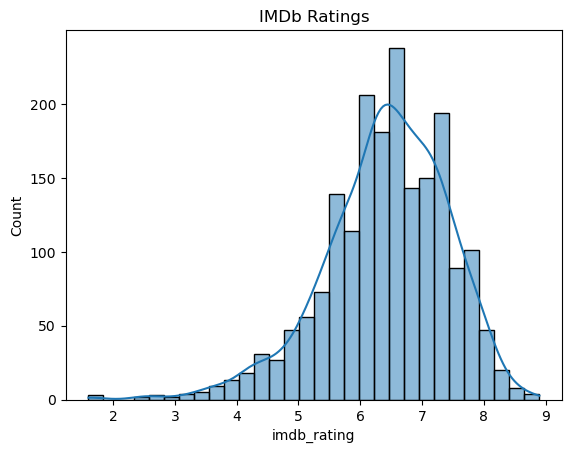

In [17]:
# 1. IMDb Ratings Distribution

sns.histplot(df['imdb_rating'], bins=30, kde=True)
plt.title("IMDb Ratings")

In [18]:
df['imdb_rating'].skew()

np.float64(-0.7249405149342673)

 The mean is 6.6. The curve is strongly left skewed meaning that its normaly distributed and there are outliers below the mean

Text(0.5, 1.0, 'TMBd Ratings')

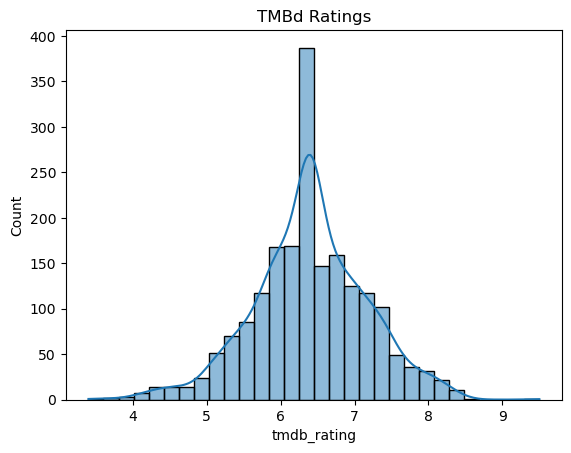

In [19]:
sns.histplot(df['tmdb_rating'], bins=30, kde=True)
plt.title("TMBd Ratings")

This is nearly normally distributed 

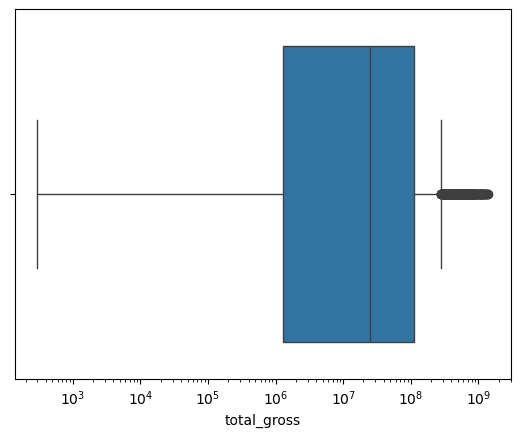

In [20]:
#2. Box Office Gross
sns.boxplot(x=df['total_gross'])
plt.xscale('log')  # Handle skew


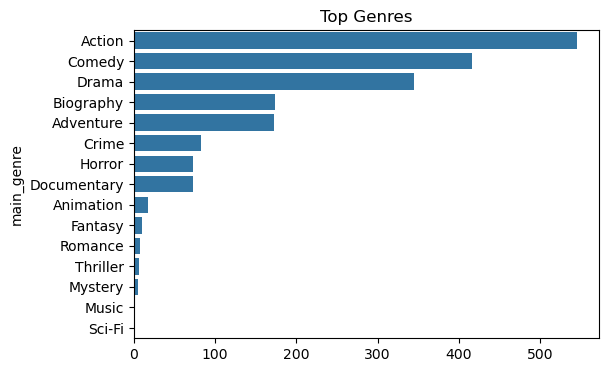

In [21]:
# Genre counts
genre_counts = df["main_genre"].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(y=genre_counts.index, x=genre_counts.values, orient="h")
plt.title("Top Genres")
plt.show()

In [22]:
#clearly people love violence and laughing and drama 

/var/folders/ln/k5h544q10vz5js3j5d_zgx8r0000gn/T/ipykernel_6325/3256545207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="year_only", palette="viridis")


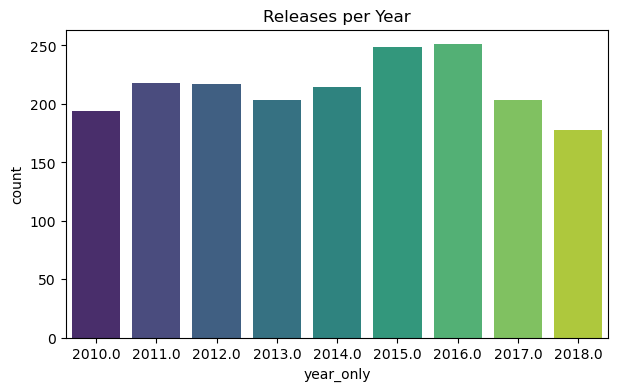

In [23]:
# Yearly counts
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="year_only", palette="viridis")
plt.title("Releases per Year")
plt.show()

In [24]:
#The year with the most releases was 2016 followed by 2015 and 2011 while the lowest was 2018, 2010,2013

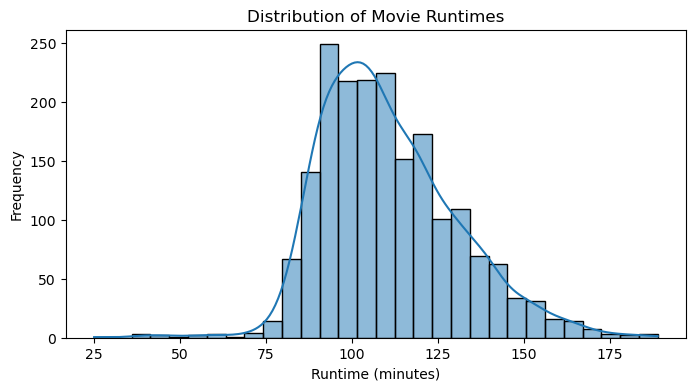

In [25]:
# Runtime Analysis

plt.figure(figsize=(8, 4))
sns.histplot(df['runtime_minutes'], bins=30, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

In [26]:
#Shows typical movie length and any unusual patterns (very short or very long movies).Skewed


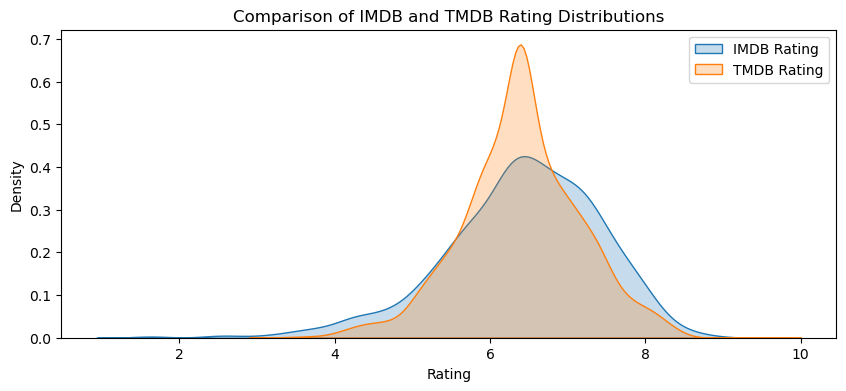

In [27]:
# Rating Distributions (IMDB vs TMDB)
plt.figure(figsize=(10, 4))
sns.kdeplot(df['imdb_rating'], label='IMDB Rating', fill=True)
sns.kdeplot(df['tmdb_rating'], label='TMDB Rating', fill=True)
plt.title('Comparison of IMDB and TMDB Rating Distributions')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

In [28]:
#Compares rating distributions between two rating systems - are they similar or different?

Bivariate Analysis for Movie Dataset

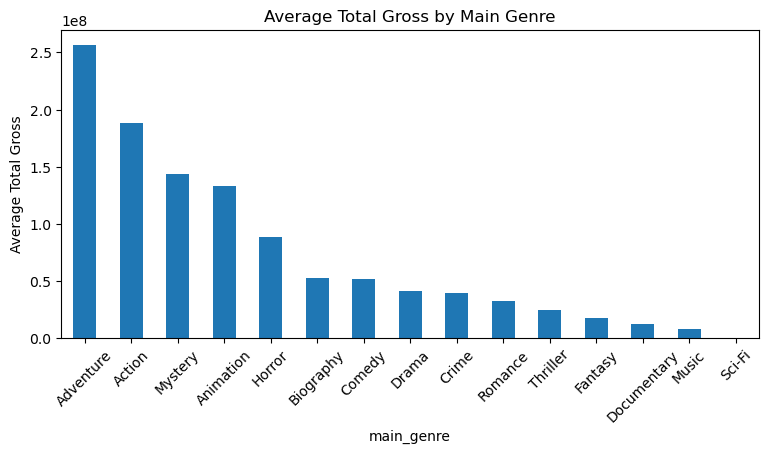

In [29]:
#Bar plots
# Average gross by main genre
plt.figure(figsize=(9, 4))
df.groupby('main_genre')['total_gross'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Total Gross by Main Genre')
plt.ylabel('Average Total Gross')
plt.xticks(rotation=45)
plt.show()


In [30]:
#so the above shows us what movie earned the most an d which one doesnt bring in as much 

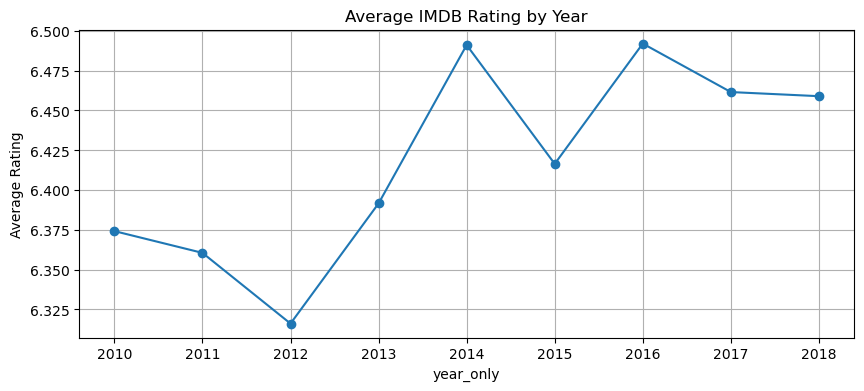

In [31]:
# Average rating by year
plt.figure(figsize=(10, 4))
df.groupby('year_only')['imdb_rating'].mean().plot(kind='line', marker='o')
plt.title('Average IMDB Rating by Year')
plt.ylabel('Average Rating')
plt.grid()
plt.show()

In [32]:
#The above shows us which year had the most ratings vs the lowest ie 2014 had the most ratings as compared to 2012  which brings about the questions does number of movies releaased in a year corelate to its ratings?

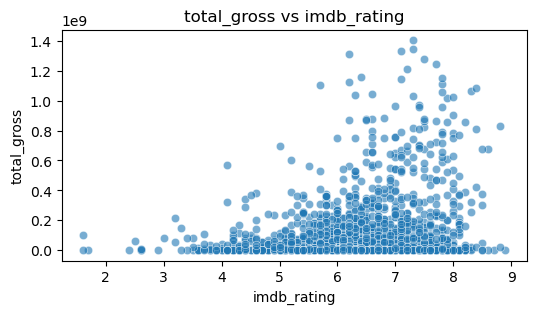

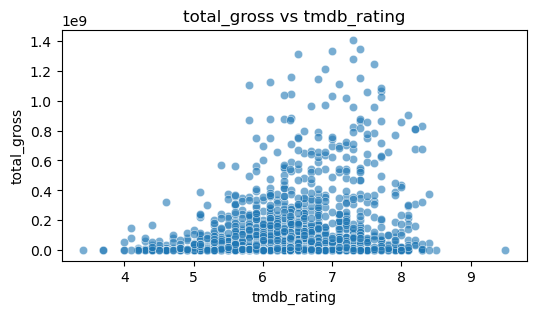

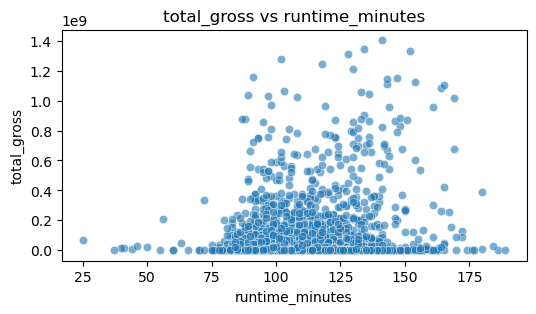

In [33]:
# Relationships between financial metrics and ratings
pairs = [('imdb_rating', 'total_gross'),
         ('tmdb_rating', 'total_gross'),
         ('runtime_minutes', 'total_gross')]

for x, y in pairs:
    plt.figure(figsize=(6, 3))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.6)
    plt.title(f'{y} vs {x}')
    plt.show()

In [34]:
#Reveals potential linear/non-linear relationships, correlation direction, and outliers between pairs of numerical variables.

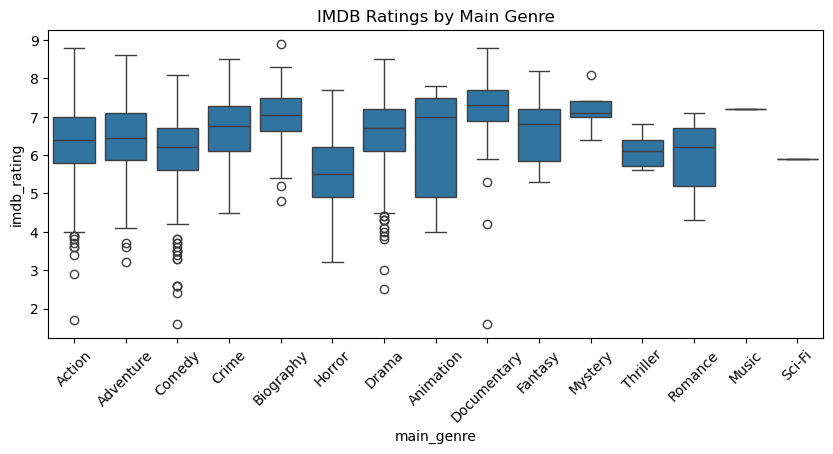

In [35]:
# Compare ratings across main genres
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='main_genre', y='imdb_rating')
plt.xticks(rotation=45)
plt.title('IMDB Ratings by Main Genre')
plt.show()


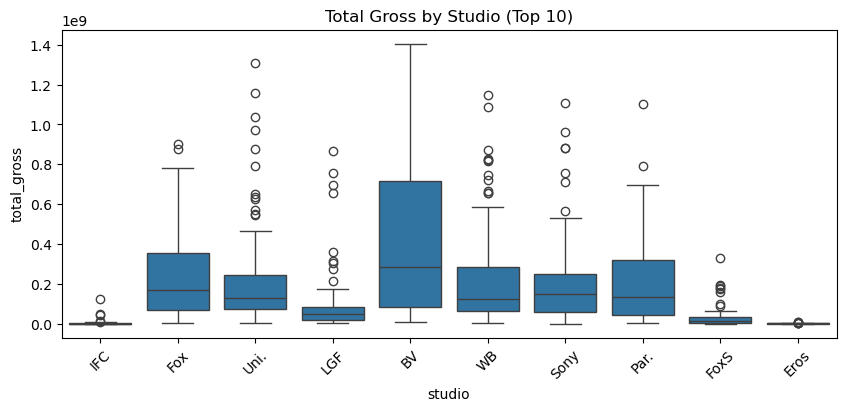

In [36]:
# Compare gross earnings by studio (top 10 studios)
top_studios = df['studio'].value_counts().head(10).index
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[df['studio'].isin(top_studios)], 
            x='studio', y='total_gross')
plt.xticks(rotation=45)
plt.title('Total Gross by Studio (Top 10)')
plt.show()

In [37]:
#Shows how numerical variables (ratings, revenue) differ across categories (genres, studios), including median, spread, and outliers.

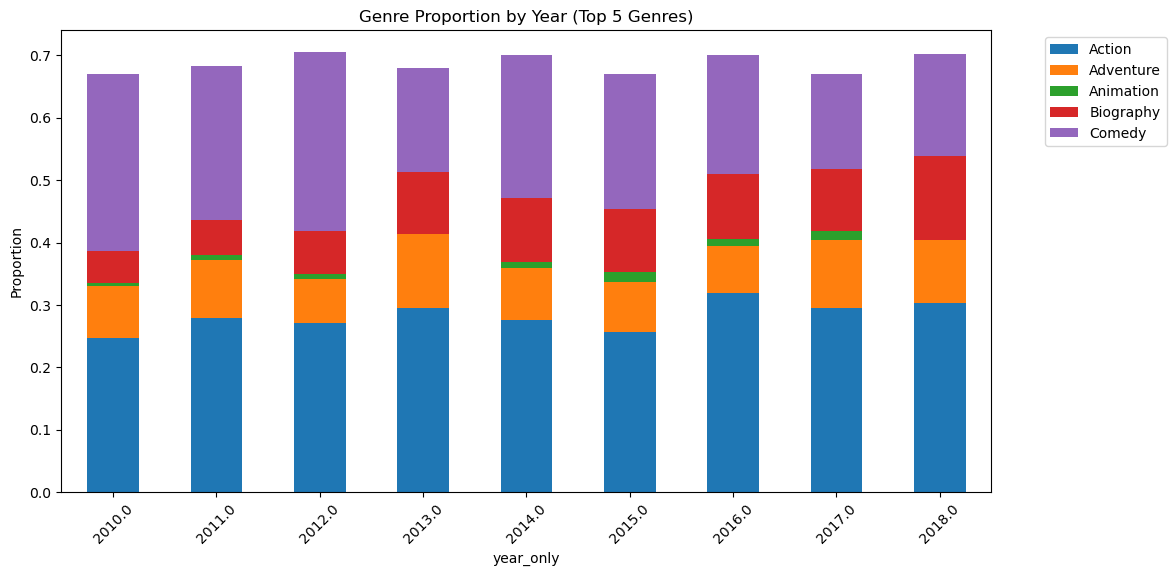

In [38]:
# Proportion of genres by year
ct = pd.crosstab(df['year_only'], df['main_genre'], normalize='index')
ct[ct.columns[:5]].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Genre Proportion by Year (Top 5 Genres)')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


In [39]:
#Shows how the composition of categories changes across another categorical variable.

<Figure size 1400x700 with 0 Axes>

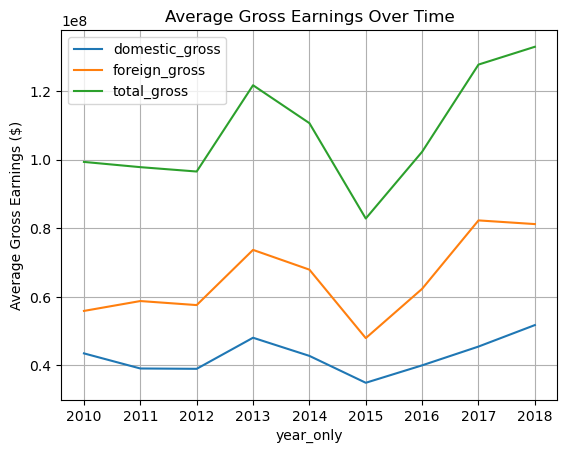

In [40]:
#Time Series Relationships
# Plot financial metrics over time
plt.figure(figsize=(14, 7))
df.groupby('year_only')[['domestic_gross', 'foreign_gross', 'total_gross']].mean().plot()
plt.title('Average Gross Earnings Over Time')
plt.ylabel('Average Gross Earnings ($)')
plt.grid()
plt.show()

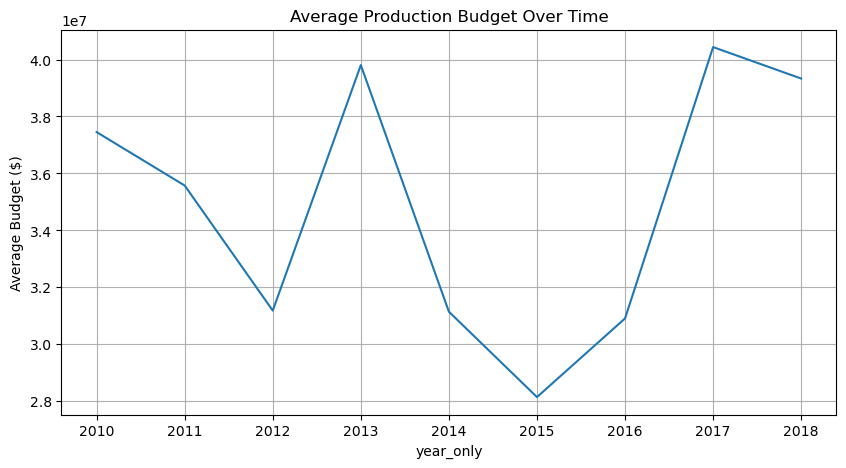

In [41]:
# Plot budgets over time
plt.figure(figsize=(10, 5))
df.groupby('year_only')['production_budget_imputed'].mean().plot()
plt.title('Average Production Budget Over Time')
plt.ylabel('Average Budget ($)')
plt.grid()
plt.show()

In [42]:
#Shows trends and potential relationships between time and financial metrics.

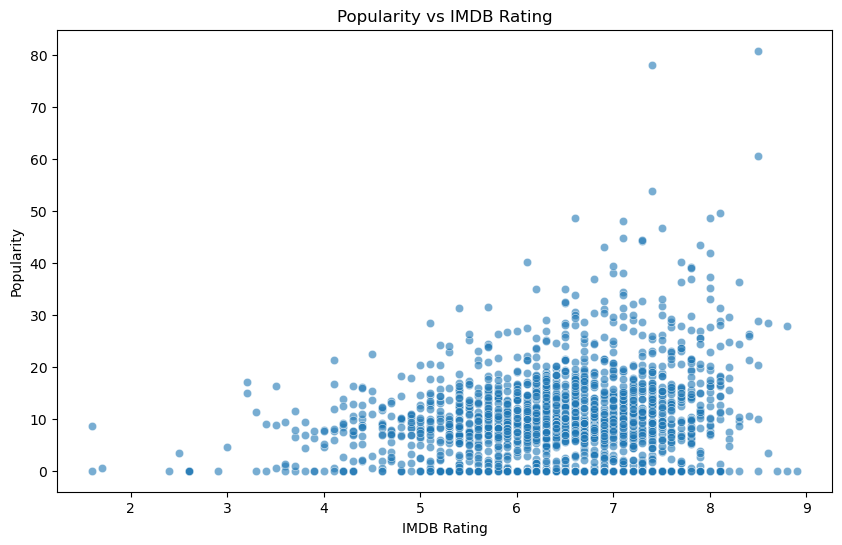

In [43]:
#Rating vs Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='imdb_rating', y='popularity', alpha=0.6)
plt.title('Popularity vs IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Popularity')
plt.show()

In [44]:
#Explores whether higher-rated movies are more popular (as measured by TMDB popularity metric).

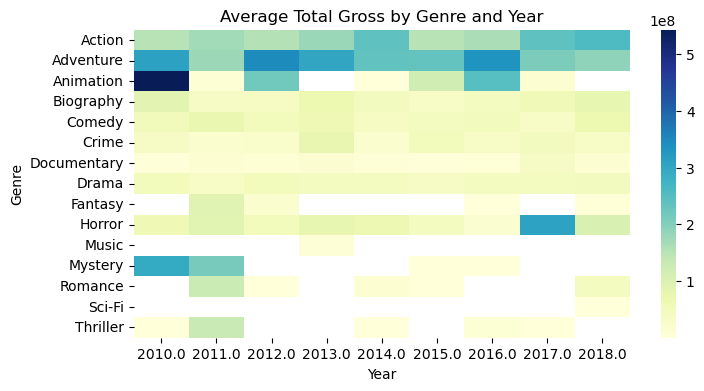

In [45]:
#Heatmap of grouped average
# Calculate average metrics by genre and year
pivot_table = df.pivot_table(index='main_genre', 
                            columns='year_only', 
                            values='total_gross', 
                            aggfunc='mean')

plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.title('Average Total Gross by Genre and Year')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.show()

In [46]:
#Shows how two categorical variables jointly affect a numerical outcome

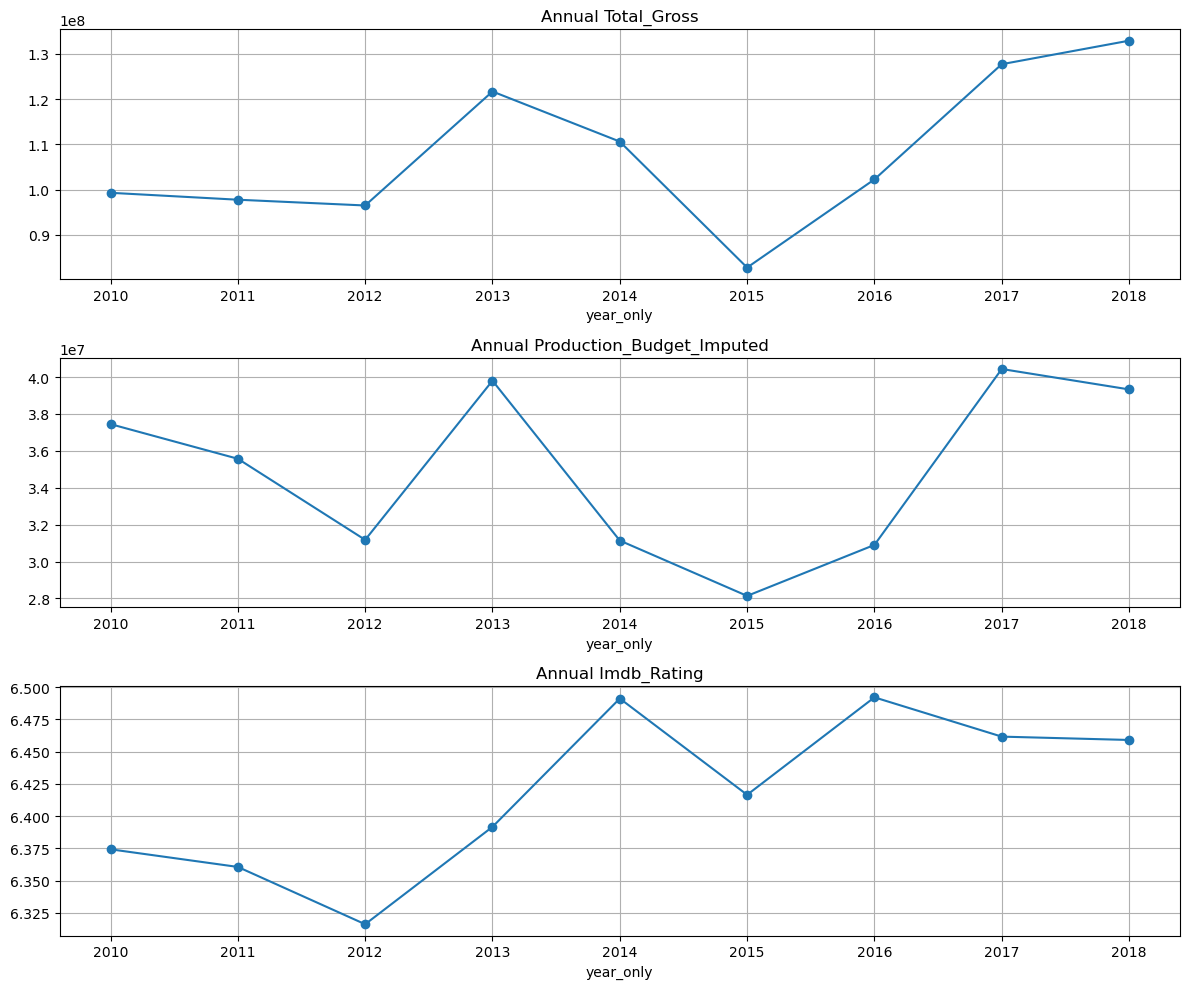

In [47]:
#Analyzing Trends Across Multiple Variables
# Resample by year and plot multiple metrics
annual_metrics = df.groupby('year_only').agg({
    'total_gross': 'mean',
    'production_budget_imputed': 'mean',
    'imdb_rating': 'mean'
})

fig, axes = plt.subplots(3, 1, figsize=(12, 10))
for i, col in enumerate(annual_metrics.columns):
    annual_metrics[col].plot(ax=axes[i], marker='o')
    axes[i].set_title(f'Annual {col.title()}')
    axes[i].grid()
plt.tight_layout()
plt.show()

In [48]:
#Reveals co-movement patterns across different metrics over time.